<a href="https://colab.research.google.com/github/liuquanchao/NLP-Paper-Reading-Schedule/blob/master/mycode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3387743818645346382, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 145084133094652706
 physical_device_desc: "device: XLA_CPU device"]

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18215547587736599499, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16071932523940314092
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 18398544863722456855
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14892338381
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1822646714472458258
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [7]:
# import the packets
import numpy as np
import pandas as pd

DATA_PATH = "breast-cancer-wisconsin.data"

# create the column names
columnNames = [
    'Sample code number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]

data = pd.read_csv(DATA_PATH, names = columnNames)
# show the shape of data
# print data.shape

# use standard missing value to replace "?"
data = data.replace(to_replace = "?", value = np.nan)
# then drop the missing value
data = data.dropna(how = 'any')

# print data.shape

# then we split this dataset in to 2 parts:
#  - train dataset
#  - test  dataset
# here we use `train_test_split` to split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data[ columnNames[1:10] ], # features
    data[ columnNames[10]   ], # labels
    test_size = 0.25,
    random_state = 43
)

# let's have a look at the distribution of the train data
# print y_train.value_counts()
# and the test's dataset
# print y_test.value_counts()

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# use logestic-regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y = lr.predict(X_test)
# use svm
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
svm_y = lsvc.predict(X_test)

# now we will check the performance of the classifier
from sklearn.metrics import classification_report
# use the classification_report to present result
# `.score` method can be used to test the accuracy
print ('Accuracy of the LogesticRegression:', lr.score(X_test, y_test))
print (classification_report(y_test, lr_y, target_names = ['Benign', 'Malignant']))


# print 'Accuracy on the train dataset: ', lr.score(X_train, y_train)
# print 'Accuracy on the predict result (should be 1.0): ', lr.score(X_test, lr_y)

print ('Accuracy of the SVM: ' , lsvc.score(X_test, y_test))
print (classification_report(y_test, svm_y, target_names = ['Benign', 'Malignant']))

Accuracy of the LogesticRegression: 0.9532163742690059
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96       111
   Malignant       0.96      0.90      0.93        60

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy of the SVM:  0.9590643274853801
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97       111
   Malignant       0.96      0.92      0.94        60

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!python /content/drive/My\ Drive/mycode/2_TitanikData/identify/test.py

Traceback (most recent call last):
  File "/content/drive/My Drive/mycode/2_TitanikData/identify/test.py", line 1, in <module>
    from mmdet.apis import init_detector, inference_detector, show_result
ModuleNotFoundError: No module named 'mmdet'


In [0]:
!pip3 install pytorch

  Using cached https://files.pythonhosted.org/packages/ee/67/f403d4ae6e9cd74b546ee88cccdb29b8415a9c1b3d80aebeb20c9ea91d96/pytorch-1.0.2.tar.gz
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
  Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-20yh78v1/pytorch/setup.py'"'"'; __file__='"'"'/tmp/pip-install-20yh78v1/pytorch/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-nmj_urwf/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [0]:
!conda create -n open-mmlab python=3.7 -y

/bin/bash: conda: command not found


<IPython.core.display.Javascript object>

Saved to photo.jpg


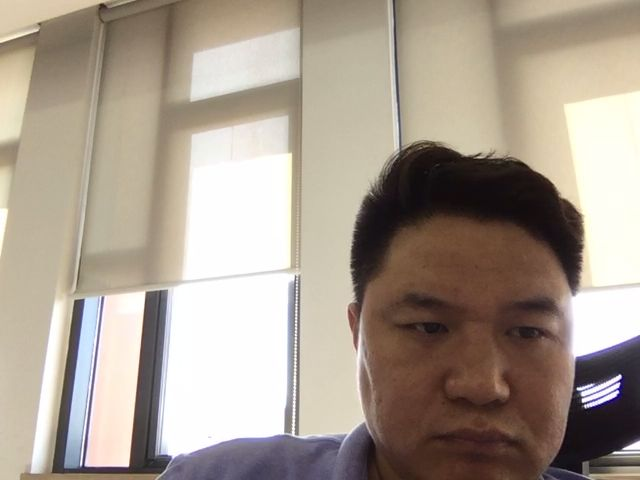

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))